# *Practice*
## Bivariate Statistics and Outliers

Observations that lie outside the overall pattern of the other observations in a bivariate data set in a vertical direction are considered *outliers*.

<img src="./images/outlier.jpg" alt="Outlier example">

Observations that lie well outside the pattern of the data in a *horizontal* direction may loosely be called outliers, but the more precise term is "influential point."

<img src="./images/influential_point.jpg" alt="Influential point example">

The point labeled above is more an influential point than an outlier because it lies well outside the horizontal range of the data (the range of the other $x$-values), but it's still close to the overall linear pattern of the data. Such points can have a big effect on the least-squares line because their position gives them a lot of "pull" on the line.

This point is an influential point *and* an outlier:

<img src="./images/influential_point_outlier.jpg" alt="Example of a point that is an influential point and an outlier">

While influential points are sometimes also outliers, the key is that the inclusion or removal of such observations can have a strong effect on the conclusions you draw from your data. These observations are usually distant from the remaining observations in a horizontal direction and considered *influential* because they can dramatically change the calculation of regression coefficients.

Generally (though not always):

- Influential points have a larger effect on the regression coefficient and a smaller effect on Pearson's $r$.
- Outliers have a larger effect on Pearson's $r$ and a smaller effect on the regression coefficient.

In this activity, you'll use your TI-83 to examine how adding and eliminating such points can affect the computation coefficients and least-squares regression lines.

In what follows, you'll move a point in a data set and recompute $r$ (the correlation coefficient) and $b$ (the slope of the regression line). The easiest way to do this with minimal button pushing is to take advantage of the feature on your TI that allows you to get quickly back to a prior instruction. Suppose you have data in `L1` ($x$) and `L2` ($y$) and have computed the regression equation of $y$ on $x$. The syntax is `LinReg(a + bx)` `L1`, `L2`, `Y1` \[Keystrokes: press `STAT`, arrow to `CALC` press `8`, `2nd`, `L1`, `2nd`, `L2`, `VARS`, arrow to `Y-VARS`, press `ENTER` `ENTER`\]. Now suppose you do something else, say `3 * 5` `ENTER` `CLEAR`. Now you want to do another regression but don't want to have to go through all the keystrokes necessary in the brackets above. Simply press `2nd` `ENTER` and the last thing you did (the `3 * 5`) will come back. Press `2nd` `ENTER` again and the `LinReg(a+bx)` `L1`, `L2`, `Y1` magically reappears. Now press `ENTER` and the instruction will be carried out for whatever data is now in `L1` and `L2`

In [1]:
%config InlineBackend.figure_format='retina'

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn import linear_model

### 1. Create scatterplots, calculate values of the correlation and regression coefficients, and observe how these statistics change as you add or remove observations from a data set.

#### A. Create a scatterplot with the following data set: $(1, 3)$, $(2, 4.5)$, $(1, 2.7)$, $(0.5, 3.3)$, $(1.5, 1.9)$, $(0, 2)$, $(-2.5, 1)$, $(-1, -1.2)$. 

Use the following window settings for a good view of the scatterplot:

In [2]:
# Window settings
Xmin = -5.5
Xmax = 3
Xscl = 1
Ymin = -1
Ymax = 5
Yscl = 1
Xres = 1

def axes_lims(xlims, ylims):
    axes = plt.gca()
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)

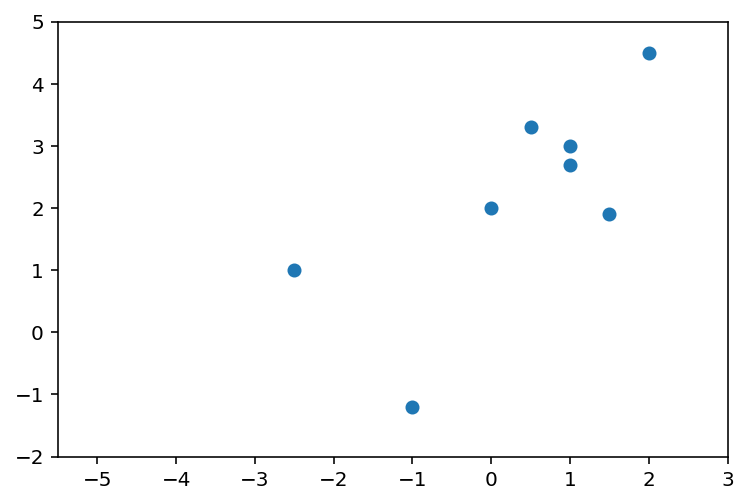

In [3]:
# The data
x = np.array([1.0, 2.0, 1.0, 0.5, 1.5, 0.0, -2.5, -1.0])
y = np.array([3.0, 4.5, 2.7, 3.3, 1.9, 2.0,  1.0, -1.2])

def q1_plot(x, y):
    # Draw a scatterplot of the data
    plt.scatter(x, y)

    # Set window size
    axes_lims([Xmin, Xmax], [Ymin - 1, Ymax])

q1_plot(x, y)

In [4]:
def print_r(x, y):
    print("Pearson's r:", pearsonr(x, y)[0])
    
def print_reg_coeff(reg):
    print("Regression coefficient:", reg.coef_[0][0])
    
def print_info(x, y, reg):
    print_r(x, y)
    print_reg_coeff(reg)

#### B. What is the value of the correlation coefficient for this data set?

In [5]:
print_r(x, y)

Pearson's r: 0.7150032839176582


#### C. What is the value of the regression coefficient from the least-squares regression equation?

Regression coefficient: 0.8367432150313154


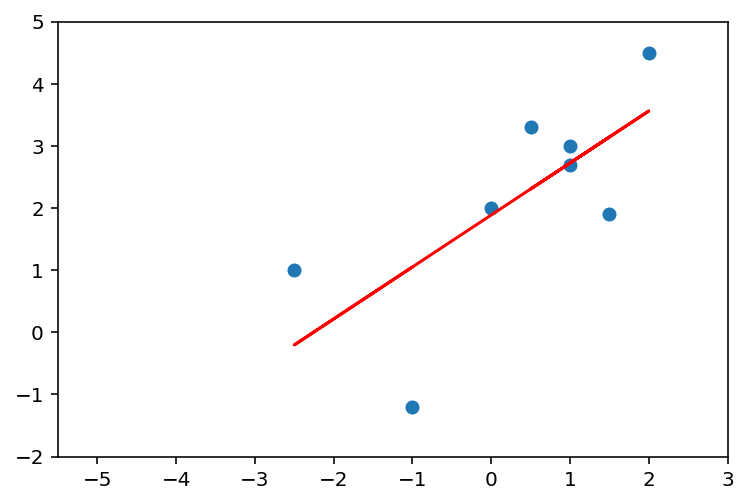

In [6]:
# Generate a linear regression model of given data
def regr(x, y):
    reg = linear_model.LinearRegression()
    reg.fit(x.reshape(-1, 1), y.reshape(-1, 1))
    return reg

reg = regr(x, y)

q1_plot(x, y)

# Plot a linear regression line
def pltreg(reg, x = x, y = y, color = "red"):
    plt.plot(x, reg.predict(x.reshape(-1, 1)), color = color)
    
pltreg(reg)
print_reg_coeff(reg)

#### D. The point in the upper right-hand corner of your scatterplot is $(2, 4.5)$. Complete the following table, which shows you what hppens as this point is moved straight down. What do you notice about the correlation coefficient and the regression coefficient? Note that you can fill in the first row of the table from your answers to B and C above. Remember to efficiently re-compute $r$ and $b$ each time after you go back into the lists to change the $y$-values.

In [7]:
def q1_D(n):
    # Save for reverting array changes
    tmp = y[1,]
    
    # Replace (2, 4.5) with (2, n) and plot it
    np.put(x, [1,], [2,])
    np.put(y, [1,], [n,])
        
    # Plot the new data
    q1_plot(x, y)
    
    # Highlight the modified data point
    plt.scatter(x[1,], n, color = "green")
    
    # Plot the new regression line
    reg = regr(x, y)
    pltreg(reg)
    
    # Print out info
    print_info(x, y, reg)
    
    # Change the data back to normal
    np.put(y, [1,], tmp)

Pearson's r: 0.7150032839176582
Regression coefficient: 0.8367432150313154


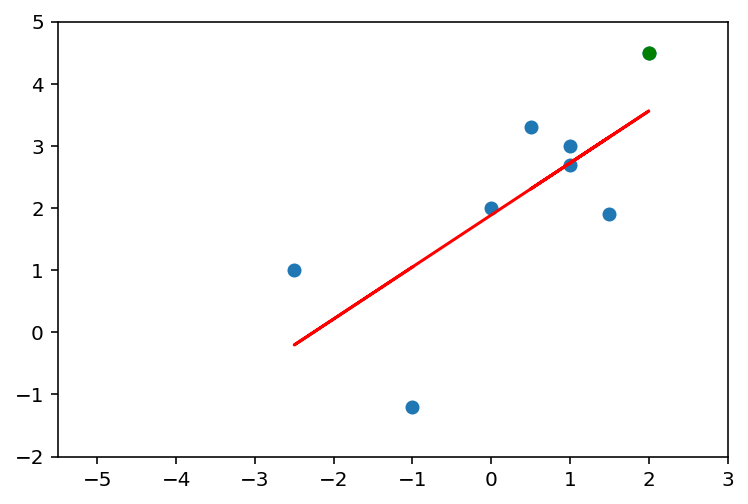

In [8]:
q1_D(4.5)

Pearson's r: 0.6578261446976388
Regression coefficient: 0.6676409185803758


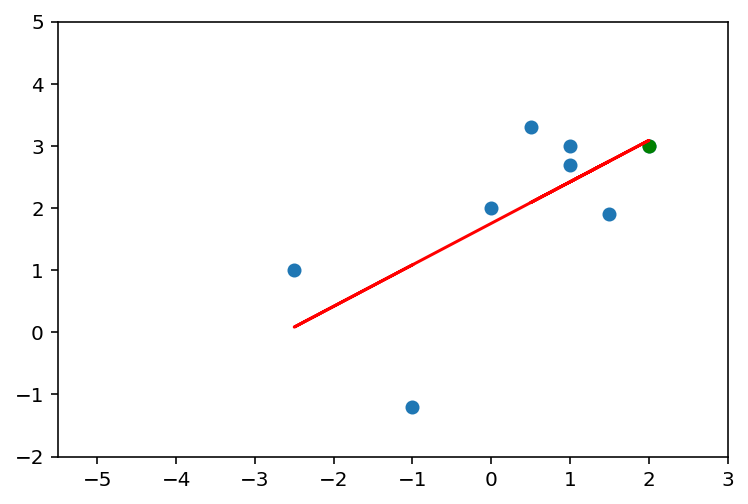

In [9]:
q1_D(3)

Pearson's r: 0.5693528796792261
Regression coefficient: 0.5549060542797494


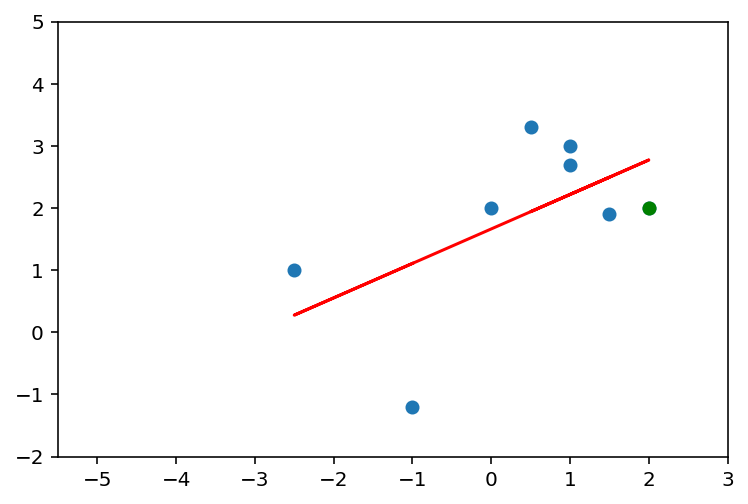

In [10]:
q1_D(2)

Pearson's r: 0.4451550867794369
Regression coefficient: 0.44217118997912325


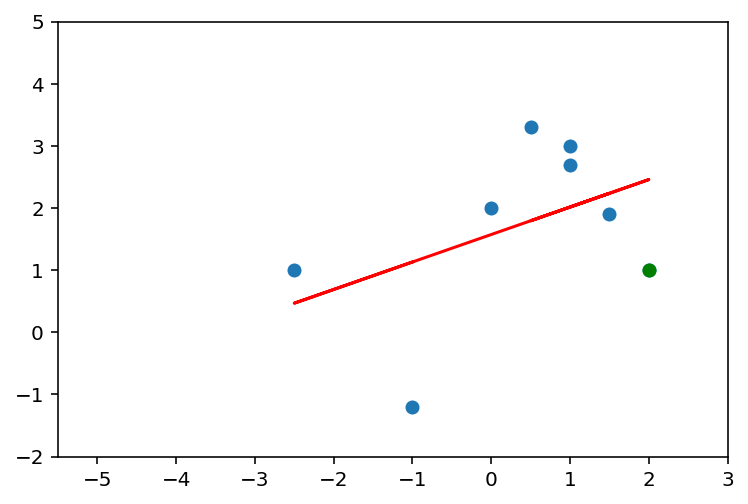

In [11]:
q1_D(1)

|  $x$  |  $y$  |  $r$  |  $b$  |
| :---: | :---: | :---: | :---: |
|   2   |  4.5  | 0.715 | 0.837 |
|   2   |   3   | 0.658 | 0.668 |
|   2   |   2   | 0.569 | 0.555 |
|   2   |   1   | 0.445 | 0.442 |

#### E. Complete the following table, which shows what happens as the point $(2, 4.5)$ is moved back and forth. What do you notice about the correlation coefficient and the regression coefficient?

In [12]:
def q1_E(n):
    # Save for reverting array changes
    tmp = x[1,]
    
    # Replace (2, 4.5) with (n, 4.5) and plot it
    np.put(x, [1,], n)
    np.put(y, [1,], [4.5,])
    
    # Plot the new data
    q1_plot(x, y)
    
    # Highlight the modified data point
    plt.scatter(x[1,], y[1,], color = "green")
    
    # Plot the new regression line
    reg = regr(x, y)
    pltreg(reg)
    
    # Print out info
    print_info(x, y, reg)
    
    # Change the data back to normal
    np.put(x, [1,], tmp)

Pearson's r: 0.7150032839176582
Regression coefficient: 0.8367432150313154


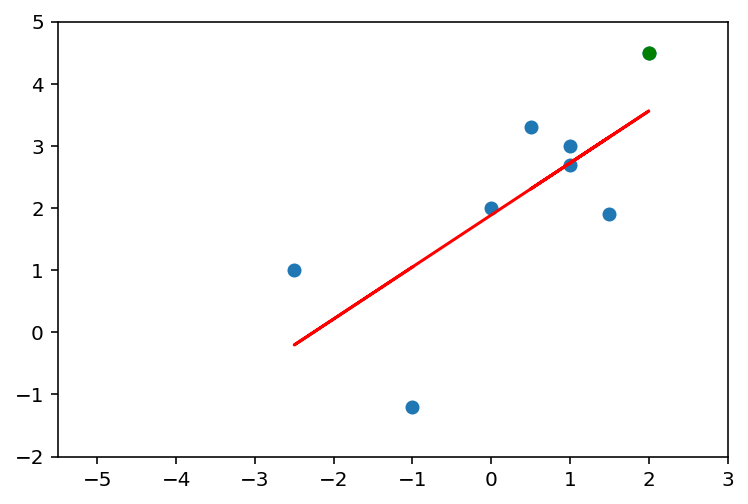

In [13]:
q1_E(2)

Pearson's r: 0.6364232377619635
Regression coefficient: 0.8160401002506262


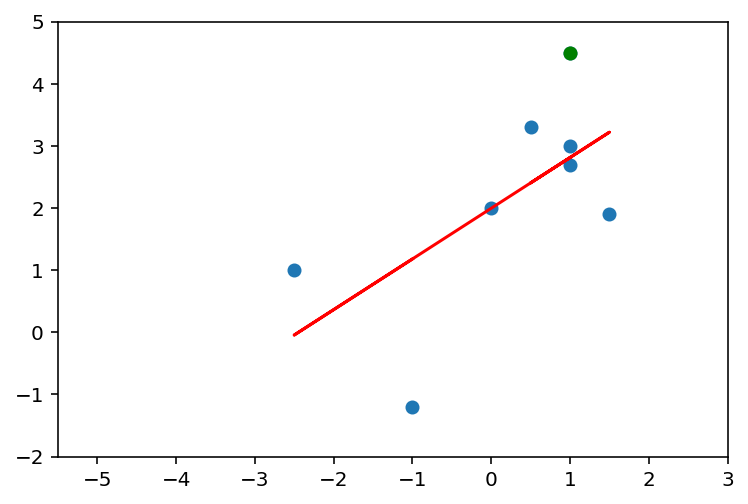

In [14]:
q1_E(1)

Pearson's r: 0.3390665735627809
Regression coefficient: 0.43046683046683043


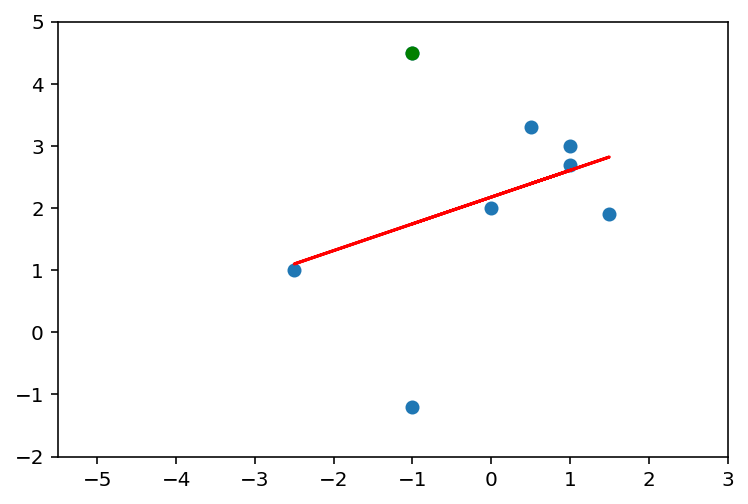

In [15]:
q1_E(-1)

Pearson's r: 0.1754872146427755
Regression coefficient: 0.20202020202020193


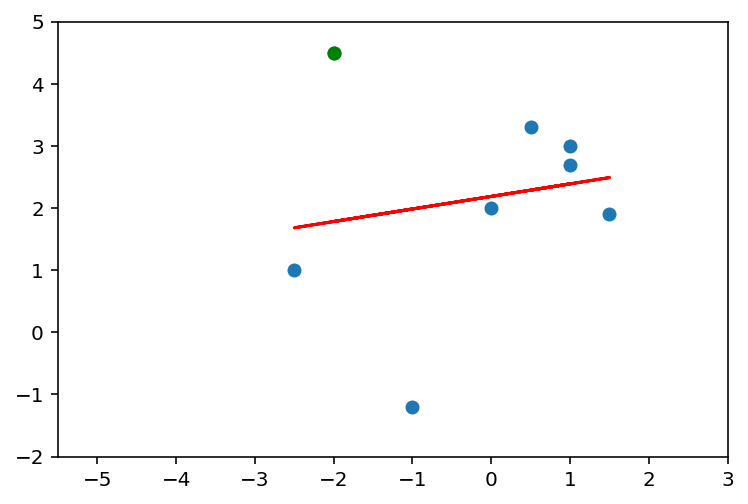

In [16]:
q1_E(-2)

|  $x$  |  $y$  |  $r$  |  $b$  |
| :---: | :---: | :---: | :---: |
|   2   |  4.5  | 0.715 | 0.837 |
|   1   |  4.5  | 0.636 | 0.816 |
|  -1   |  4.5  | 0.339 | 0.430 |
|  -2   |  4.5  | 0.175 | 0.202 |

### 2. In the scatterplot from question 1, put the stray point (the one you moved) back to where it was originally.

Add the following observation to the data set from question 1: $(-5, -0.5)$. If you want to see the scatterplot with this point highlighted, enter it in `L3` and `L4`, set up scatterplot 2 to show just this point and use a different symbol than the one for the data of question 1.

#### A. Would you call this additional observation an outlier or an influential point?

Pearson's r: 0.7650413805457084
Regression coefficient: 0.6251040221914008


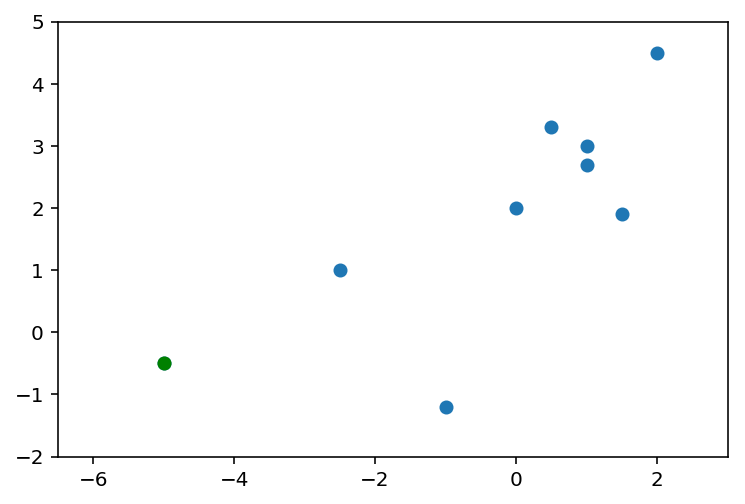

In [17]:
def q2(x = x, y = y, new_x = [-5], new_y = [-0.5], show_reg = False, part_c = False, xlim = [Xmin - 1, Xmax], ylim = [Ymin - 1, Ymax], highlight = True):
    x_res = np.array(x)
    y_res = np.array(y)
    for i in new_x:
        x_res = np.append(x_res, i)
    for i in new_y:
        y_res = np.append(y_res, i)
    
    # Add new point
    q1_plot(x_res, y_res)

    # Highlight the new data point
    if highlight:
        plt.scatter(x_res[-1,], y_res[-1,], color = "green")
    
    # Plot new regression line
    reg = regr(x_res, y_res)
    if show_reg or part_c:
        pltreg(reg, x_res, y_res)
    
    # Set axis limits
    axes_lims(xlim, ylim)
    
    # Print info
    print_info(x_res, y_res, reg)
    if part_c:
        print("Residual of new observation:", y_res[-1,] - reg.predict(x_res.reshape(-1, 1))[-1,0])
    
q2()

> It seems to be an influential point.

#### B. Discuss how the values of the correlation coefficient and regression coefficient have changed as a result of adding this observation to the data set. To do this, simply add the `-5` at the bottom of `L1` and pair it with `= .5` at the bottom of `L2`. Then press `2nd` `ENTER` until you get back to `LinReg(a+bx)` `L1`, `L2`, `Y1`.

Pearson's r: 0.7650413805457084
Regression coefficient: 0.6251040221914008


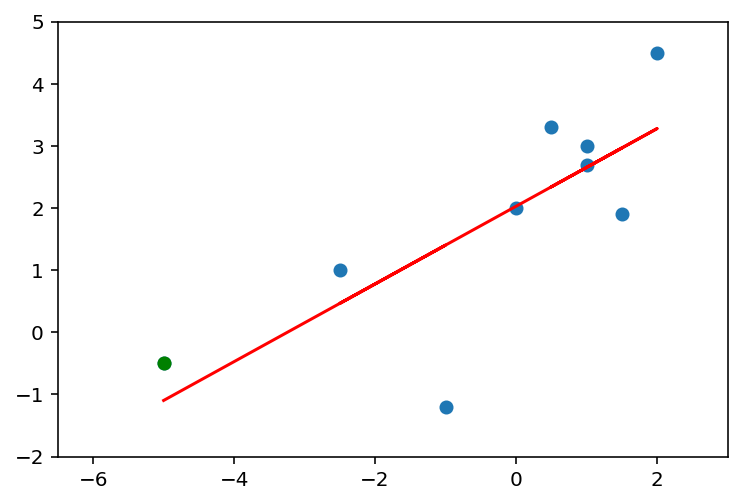

In [18]:
q2(show_reg = True)

> The correlation coefficient and regression coefficient both changed as result of adding this observation to the data sest, with the regression coefficient being more affected.

#### C. Compute the value of the residual for this new observation with the new least-squares regression equation. On your TI-83, this can be computed by `-.5 - Y1(-5)` (that is, actual minus predicted).

Pearson's r: 0.7650413805457084
Regression coefficient: 0.6251040221914008
Residual of new observation: 0.5963245492371709


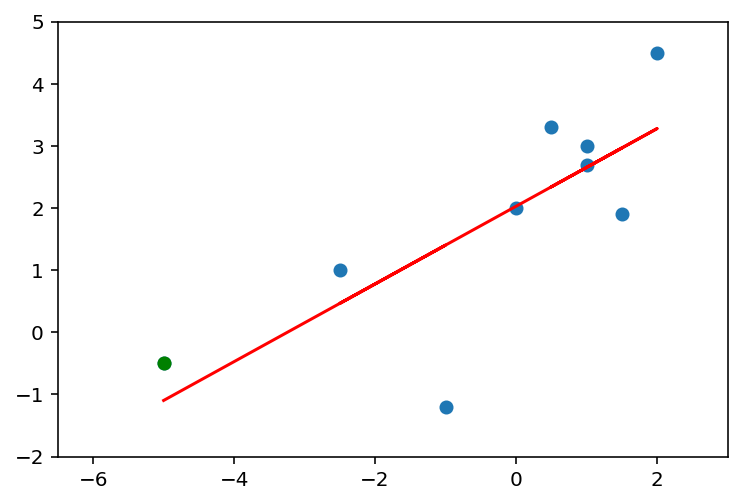

In [19]:
q2(part_c = True)

### 3. Now add this observation to the expanded data set from question 2: $(3, -3)$.

Pearson's r: 0.2194121457433938
Regression coefficient: 0.21548516842634483


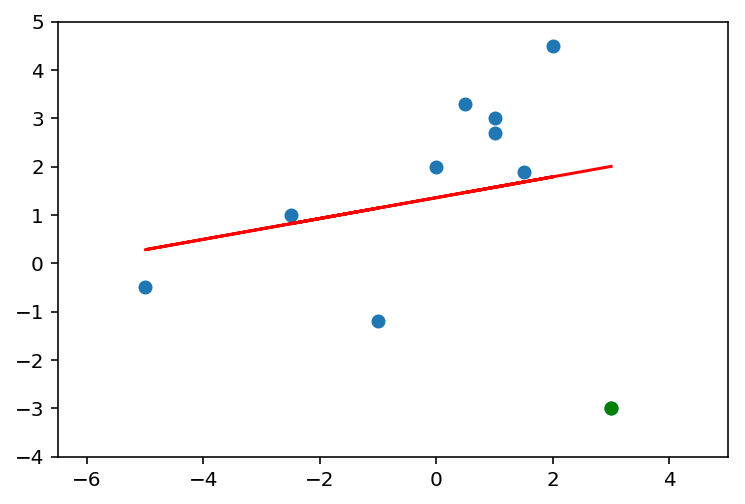

In [20]:
def q3(show_reg = False):
    q2(new_x = [-5, 3], new_y = [-0.5, -3], show_reg = show_reg)
    axes_lims([Xmin - 1, Xmax + 2], [Ymin - 3, Ymax])
q3(show_reg = True)

#### A. Would you call this additional observation an outlier or an influential point? If you want to see the scatterplot with this point to help you answer this question, remember to put the point in `L3` and `L4` and use a separate `STAT PLOT` with a different point symbol. You may also have to readjust your `WINDOW` settings with a higher `Xmax` and lower `Ymin`.

> I would call this additional observation an outlier, as its $y$ value is far removed from the observed bivariate data, but it is not an influential point since its $x$ value is not distant from the rest of the bivariate data.

#### B. Discuss how the values of the correlation coefficient and regression coefficient have changed as a result of adding this observation to the data set.

> The values of both the correlation coefficient and regression coefficient have dramatically reduced as a result of adding this observation to the data set.

### 4. The following data set examines the relationship between age (explanatory variable) and the height of trees in a forest. A scatterplot of 10 observations is shown below:

<img src="./images/tree_height.jpg" alt="Tree height scatterplot">

#### A. Which of the following is closest to the value of the correlation coefficient for this set of data?

**A.** -0.50  
**B.** 0.00  
**C.** 0.40  
**D.** 0.99  
**E.** -0.15

Pearson's r: 0.4181768257012369
Regression coefficient: 0.5916984055257891


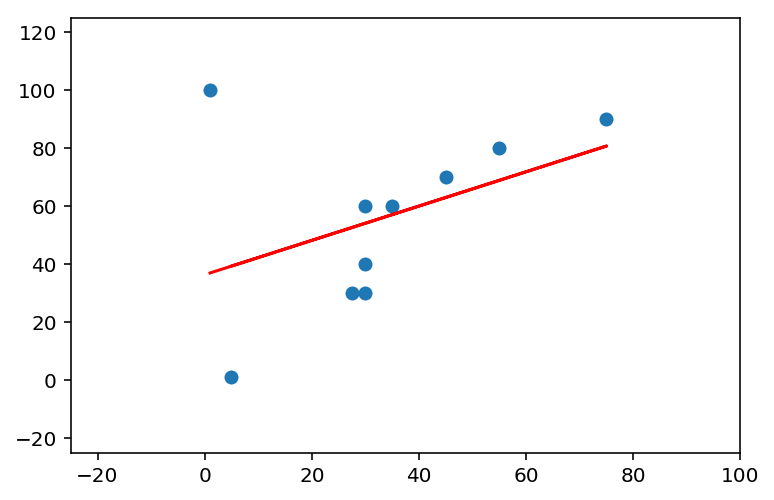

In [21]:
# Rough estimation
def q4(show_reg = False, part_b = False):
    age = np.array([5, 27.5, 30, 30, 30, 35, 45, 55, 75])
    height = np.array([1, 30, 30, 40, 60, 60, 70, 80, 90])
    
    # Remove the outlier for part B
    if not part_b:
        age = np.append(age, 1)
        height = np.append(height, 100)
        
    # Draw scatterplot
    plt.scatter(age, height)
    
    # Plot regression line
    reg = regr(age, height)
    pltreg(reg, age, height)
    
    print_info(age, height, reg)
    
    # Set window size
    axes_lims([-25, 100], [-25, 125])
q4(show_reg = True)

> **C.** 0.40

#### B. In your mind, identify and remove the outlier observation from this data set. Discuss what's likely to happen to the values of the correlation coefficient and the slope of the regression line. To help answer this question it might be useful to roughly draw where the least-squares regression line might fall in the original data, and then draw a second line with the outlier observation removed.

Pearson's r: 0.9214742094793583
Regression coefficient: 1.3233183856502249


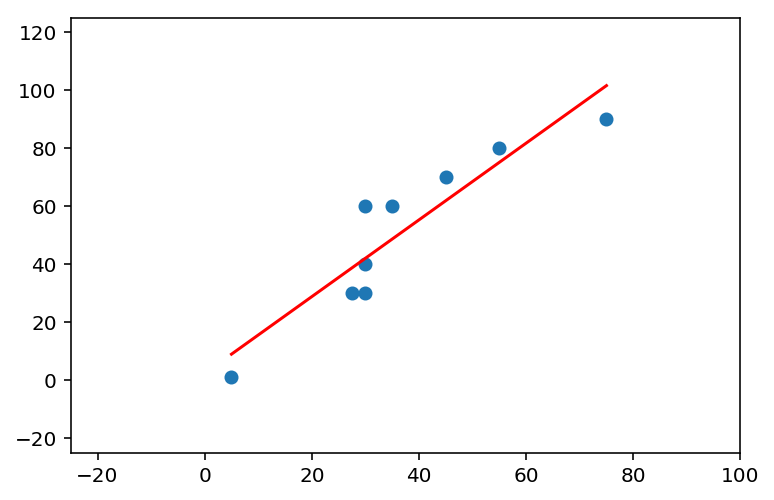

In [22]:
q4(part_b = True, show_reg = True)

> The correlation coefficient and the slope of the regression line both increase dramatically when the outlier observation is removed from this data set.

#### C. If these were maple trees, would you suggest discarding the outlier from the data?

> Yes, I would suggest discarding the outlier from the data as it is practically impossible for a maple tree to be 100 ft tall at the age of 0.

### 5. Say you've done a survey and have the following data set with information about temperatures and hiking behavior in 15 different Wesst Coast cities. (This is hypothetical data.) You believe there is a relationship between the average summer temperature (average temperature in Fahrenheit for June-August) and the percent of residents who go hiking more than once a week.

In [23]:
city = np.array(["Seattle, WA","Boise, ID","Bend, OR","Los Angeles, CA","San Diego, CA","Portland, OR","Yakima, WA","Sacramento, CA","Las Vegas, NV","Vancouver, BC","Redding, CA","Stockton, CA","Eureka, CA","Eugene, OR","Spokane, WA"])
temp = np.array([73.5,81.2,83.5,82.8,77.4,76.9,86.4,89.2,92.3,69.8,93.1,86.3,64.9,74.5,83.9])
pctg = np.array([36.5,27.5,40.9,24.5,21.0,33.9,19.0,21.9,15.4,31.9,20.8,22.0,41.8,35.9,22.3])

#### A. Using the TI-83, create a scatterplot with least-squares regression line and calculate the values of the regression and correlation coefficients. What does this information tell you about the relationship between these variables?

Pearson's r: -0.7579881603004096
Regression coefficient: -0.7857941104319124


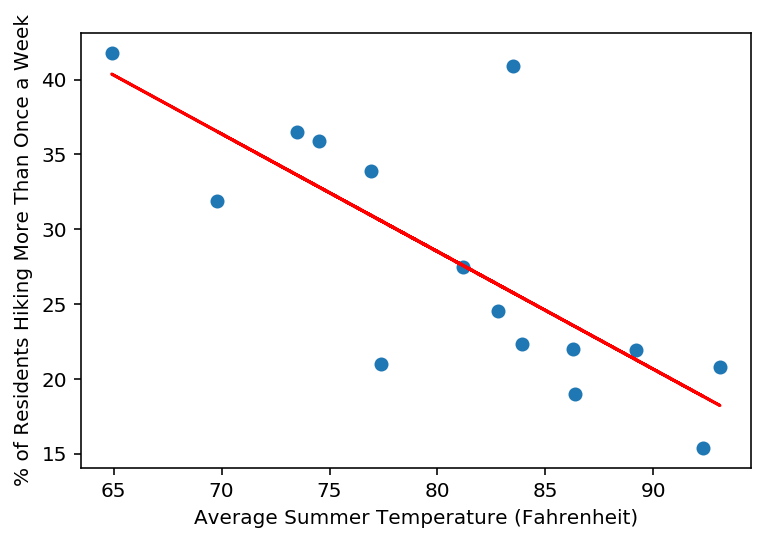

In [24]:
def q5(x = temp, y = pctg, city = city, new_x = [], new_y = [], new_city = []):
    city_res = np.array(city)
    x_res = np.array(x)
    y_res = np.array(y)
    
    for i in new_city:
        city_res = np.append(city_res, i)
    for i in new_x:
        x_res = np.append(x_res, i)
    for i in new_y:
        y_res = np.append(y_res, i)
        
    plt.scatter(x_res, y_res)
    plt.xlabel("Average Summer Temperature (Fahrenheit)")
    plt.ylabel("% of Residents Hiking More Than Once a Week")
    reg = regr(x_res, y_res)
    pltreg(reg, x_res, y_res)
    print_info(x_res, y_res, reg)
q5()

> This information tells me that the relationship between these variables is negative, that is as the average summer temperature in degrees Fahrenheit increases, the percentage of residents hiking more than once a week decreases.

#### B. The following hypothetical city is added to our original data set: 

```
City: "Coolsummer, CA"
Temperature: 62.9
% Hiking: 38.7%
```

What effect does adding this observation have on the correlation coefficient and regression coefficient? Would you consider this observation an influential point, outlier, neither, or both?

Pearson's r: -0.7818982734862092
Regression coefficient: -0.7411898920757994


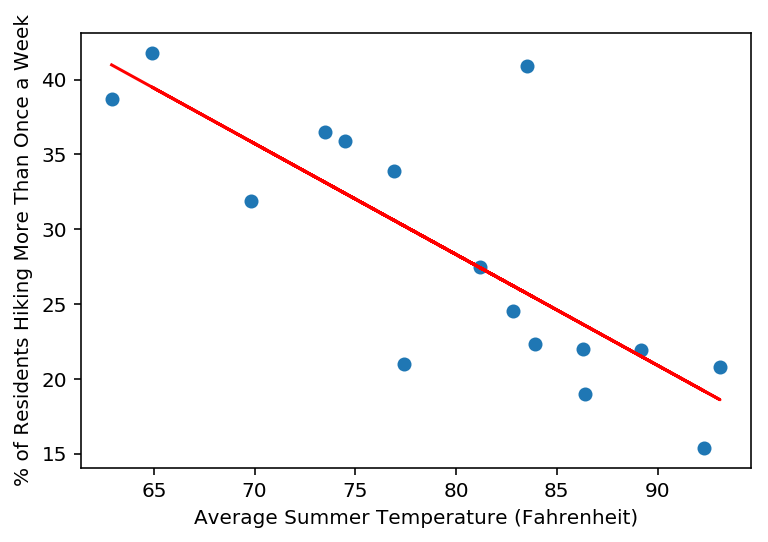

In [25]:
q5(new_city = ["Coolsummer, CA"], new_x = [62.9], new_y = [38.7])

> Adding this observation decreases the correlation coefficient and increases the regression coefficient, both with little impact. I would not consider this observation as an influential point nor an outlier, as it is not very distant from the rest of the bivariate data in either direction.

#### C. Now add the following city to the data set. (You should now have a total of 17 observations.)

```
City: "Davis, CA"
Temperature: 90.5
% Hiking: 47.5%
```

What effect does adding this observation have on the correlation coefficient and regression coefficient? Would you consider this observation an influential point, outlier, neither, or both?

Pearson's r: -0.5197109543629139
Regression coefficient: -0.5411573313206544


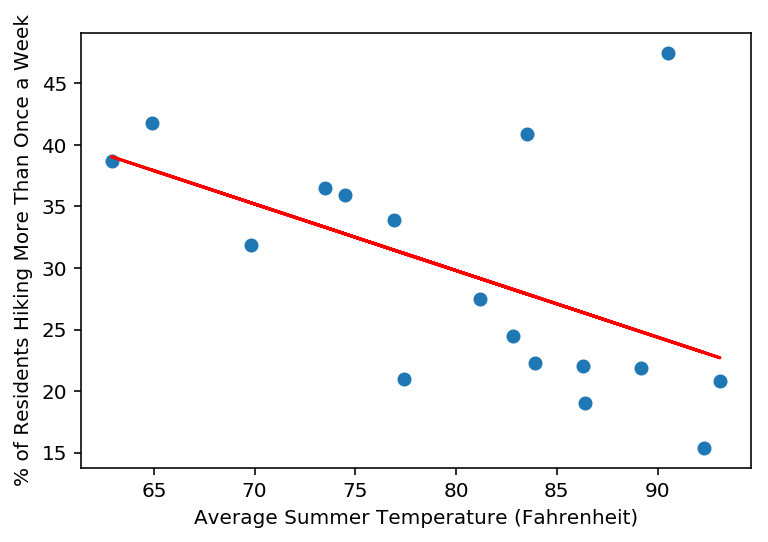

In [26]:
q5(new_city = ["Coolsummer, CA", "Davis, CA"], 
   new_x = [62.9, 90.5], 
   new_y = [38.7, 47.5])

> Adding this observation dramatically increased both the correlation coefficient and regression coefficient, so I would consider this observation both an influential point and an outlier.